# Google Brain - Ventilator Pressure Prediction
## Simulate a ventilator connected to a sedated patient's lung 

The ventilator data used in this competition was produced using a modified open-source ventilator connected to an artificial bellows test lung via a respiratory circuit. The diagram below illustrates the setup, with the two control inputs highlighted in green and the state variable (airway pressure) to predict in blue. The first control input is a continuous variable from 0 to 100 representing the percentage the inspiratory solenoid valve is open to let air into the lung (i.e., 0 is completely closed and no air is let in and 100 is completely open). The second control input is a binary variable representing whether the exploratory valve is open (1) or closed (0) to let air out.

In this competition, participants are given numerous time series of breaths and will learn to predict the airway pressure in the respiratory circuit during the breath, given the time series of control inputs.

![img](https://raw.githubusercontent.com/google/deluca-lung/main/assets/2020-10-02%20Ventilator%20diagram.svg)

Each time series represents an approximately 3-second breath. The files are organized such that each row is a time step in a breath and gives the two control signals, the resulting airway pressure, and relevant attributes of the lung, described below.

## Columns

    id - globally-unique time step identifier across an entire file
    breath_id - globally-unique time step for breaths
    R - lung attribute indicating how restricted the airway is (in cmH2O/L/S). Physically, this is the change in pressure per change in flow (air volume per time). Intuitively, one can imagine blowing up a balloon through a straw. We can change R by changing the diameter of the straw, with higher R being harder to blow.
    C - lung attribute indicating how compliant the lung is (in mL/cmH2O). Physically, this is the change in volume per change in pressure. Intuitively, one can imagine the same balloon example. We can change C by changing the thickness of the balloon’s latex, with higher C having thinner latex and easier to blow.
    time_step - the actual time stamp.
    u_in - the control input for the inspiratory solenoid valve. Ranges from 0 to 100.
    u_out - the control input for the exploratory solenoid valve. Either 0 or 1.
    pressure - the airway pressure measured in the respiratory circuit, measured in cmH2O.



## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
train = pd.read_csv('data/train.csv')

In [3]:

train.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987


In [4]:
train.corr().pressure

id          -0.002402
breath_id   -0.002394
R            0.015976
C           -0.036727
time_step   -0.524829
u_in         0.308136
u_out       -0.614910
pressure     1.000000
Name: pressure, dtype: float64

In [5]:
for column in train.columns:
    print(f'Column {column} has: {len(train[column].unique())} unique values')

Column id has: 6036000 unique values
Column breath_id has: 75450 unique values
Column R has: 3 unique values
Column C has: 3 unique values
Column time_step has: 3767571 unique values
Column u_in has: 4020300 unique values
Column u_out has: 2 unique values
Column pressure has: 950 unique values


 As we can see there ar only 3 differents values in the'R' and 'C' columns, and 2 different values in the 'u_out' column

In [6]:
columns = ['R', 'C', 'u_out']
ticker = {}
for col in columns:
    unique_values = train[col].unique()
    print(f'{col}: {unique_values}')
    ticker[col] = unique_values

R: [20 50  5]
C: [50 20 10]
u_out: [0 1]


In [7]:
#plot graph that analises the lelation between pressure, and the opening of the 2 valves
def plot_graph(id):
    df = train[train.breath_id==id]
    print(f'R: {df.R.min()}, C: {df.C.max()}')
    fig, ax = plt.subplots()
    ax.plot( df.time_step, df.pressure, label='pressure')
    ax.plot( df.time_step, df.u_in, label='air intake')
    ax.plot(df.time_step, df.u_out)
    ax.set(xlabel='time(s)', ylabel='scale')
    ax.grid()
    plt.legend()
    plt.show()

R: 20, C: 50


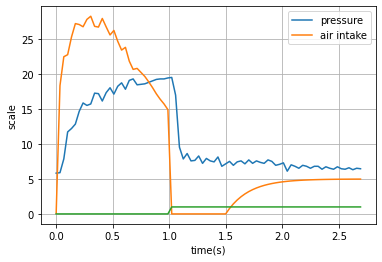

R: 20, C: 20


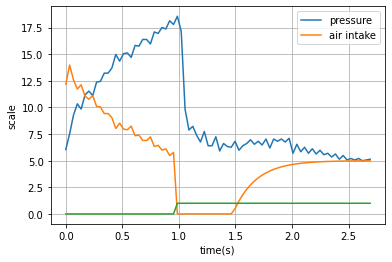

R: 50, C: 20


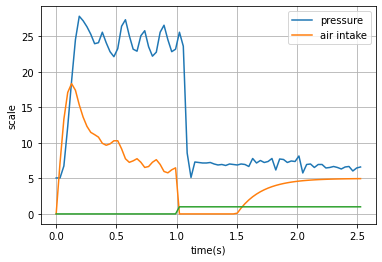

R: 50, C: 50


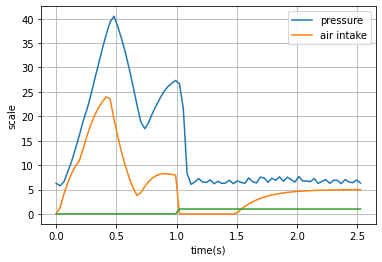

R: 5, C: 50


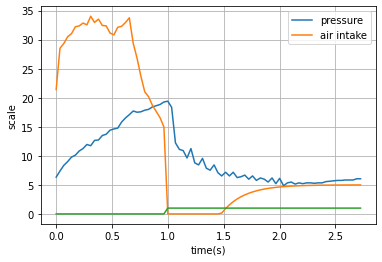

In [8]:
for i in list(train.breath_id.unique()[0:5]):
    plot_graph(i)

# HYP1: 
## The variables R and C values are determinant in the behavior of the reletion between the valves opening and the pressure, and since they have only 3 unique values each are going to be treated as categorical variables. So we are going to devide the dataframe in 18 clusters that are representing the combination of the unique values on the variables 'R', 'C' and 'u_out'.


In [11]:

    train['label']= train.R.map(str)+'_'+train.C.map(str)+'_'+train.u_out.map(str)

In [15]:
labels = train.label.unique()
for l in labels:
    train.loc[train.label = label]